In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [36]:
df = pd.read_csv("FAOFP1990_2022.csv", delimiter=" ")
df.head()

,Date,Food.Price.Index,Meat,Dairy,Cereals,Oils,Sugar
1,01/01/1990,64.1,73.4,53.5,64.1,44.59,87.9
2,01/02/1990,64.5,76.0,52.2,62.2,44.50,90.7
3,01/03/1990,63.8,77.8,41.4,61.3,45.75,95.1
4,01/04/1990,65.8,80.4,48.4,62.8,44.02,94.3
5,01/05/1990,64.4,81.0,39.2,62.0,45.50,90.4


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 1 to 390
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              390 non-null    object 
 1   Food.Price.Index  390 non-null    float64
 2   Meat              390 non-null    float64
 3   Dairy             390 non-null    float64
 4   Cereals           390 non-null    float64
 5   Oils              390 non-null    float64
 6   Sugar             390 non-null    float64
dtypes: float64(6), object(1)
memory usage: 24.4+ KB


In [38]:
df.describe()

,Food.Price.Index,Meat,Dairy,Cereals,Oils,Sugar
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,84.974359,83.771026,83.600000,86.184615,88.221897,80.760513
std,25.680581,16.833919,32.682621,31.002685,37.704093,31.144603
min,50.500000,51.100000,36.800000,48.600000,35.830000,31.800000
25%,63.725000,70.625000,55.050000,60.025000,62.262500,57.950000
50%,78.450000,82.100000,76.200000,84.200000,80.415000,74.900000
75%,99.000000,97.075000,109.150000,101.750000,105.752500,99.000000
max,159.700000,125.900000,156.500000,173.500000,251.800000,183.200000


Change Dtype in data column

In [39]:
df["Date"] = df["Date"].astype("datetime64")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 1 to 390
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              390 non-null    datetime64[ns]
 1   Food.Price.Index  390 non-null    float64       
 2   Meat              390 non-null    float64       
 3   Dairy             390 non-null    float64       
 4   Cereals           390 non-null    float64       
 5   Oils              390 non-null    float64       
 6   Sugar             390 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 24.4 KB


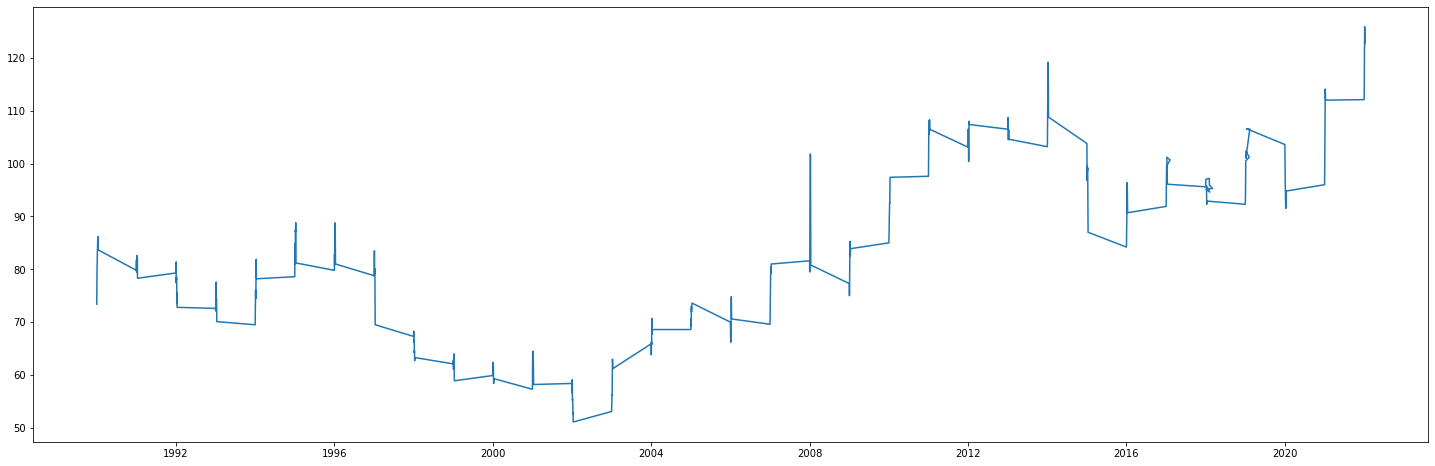

In [40]:
x = df["Date"]
y = df["Meat"]

plt.figure(figsize=(25,8))
plt.plot(x,y)
plt.show()

In [41]:
#df_test = df.rolling(8).mean()
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index('Date')



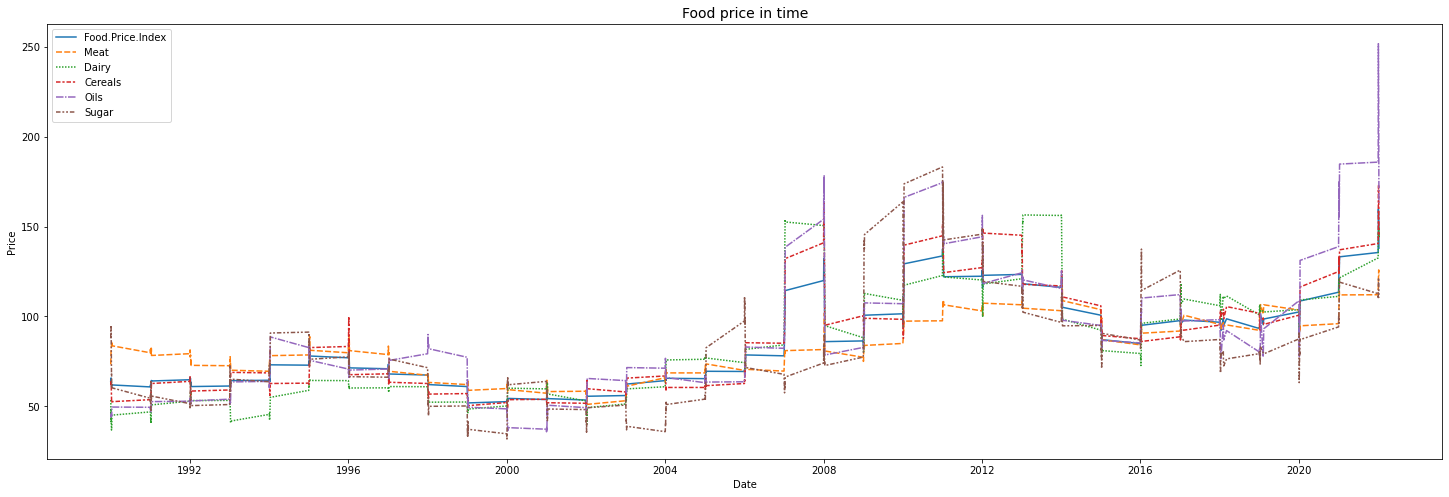

In [45]:
plt.figure(figsize=(25,8))
sns.lineplot(data=df,palette="tab10")
plt.title('Food price in time', size=14)
plt.ylabel('Price')
plt.xlabel('Date')
plt.show();

In [ ]:
df_mean = pd.read_csv('FAOFP1990_2022.csv', delimiter=' ')
df_mean['month_year'] = pd.DatetimeIndex(df_mean['Date']).to_period('M')
#df_mean = df_mean.drop(['Date'], axis=1)
df_mean = df_mean.groupby(['month_year']).mean()
df_mean.head()

,Food.Price.Index,Meat,Dairy,Cereals,Oils,Sugar
month_year,,,,,,
1990-01,63.016667,81.550000,42.616667,58.083333,45.471667,77.700000
1991-01,62.058333,80.633333,45.466667,57.866667,49.007500,55.483333
1992-01,63.925000,77.516667,54.800000,60.958333,52.993333,56.025000
1993-01,61.933333,74.066667,48.608333,59.025000,53.965833,62.025000
1994-01,66.933333,75.333333,47.408333,61.933333,71.867500,74.950000


##### Correlation
Correlation barplots by Oils and Sugar

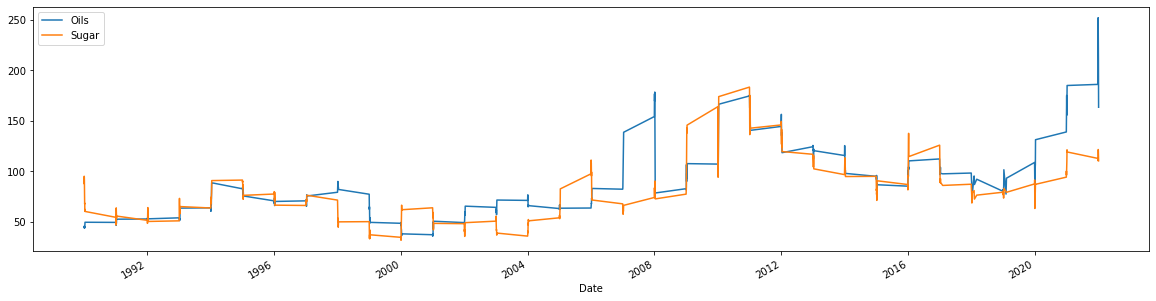

In [ ]:

df.plot(x="Date", y=["Oils","Sugar"], figsize=(20,5));

In [ ]:
df_corr = df.corr()

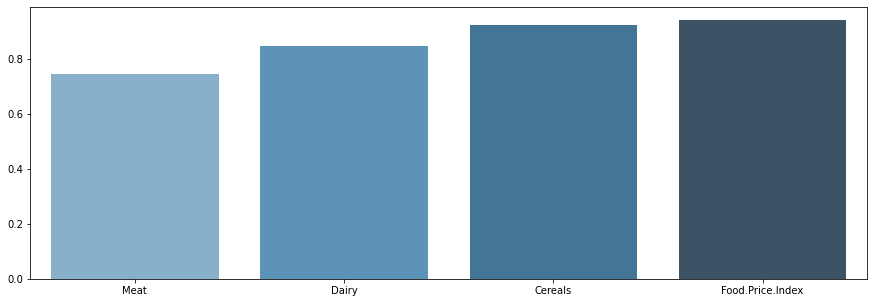

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=df_corr["Oils"].sort_values().iloc[1:-1].index, y=df_corr["Oils"].sort_values().iloc[1:-1].values, palette= "Blues_d");

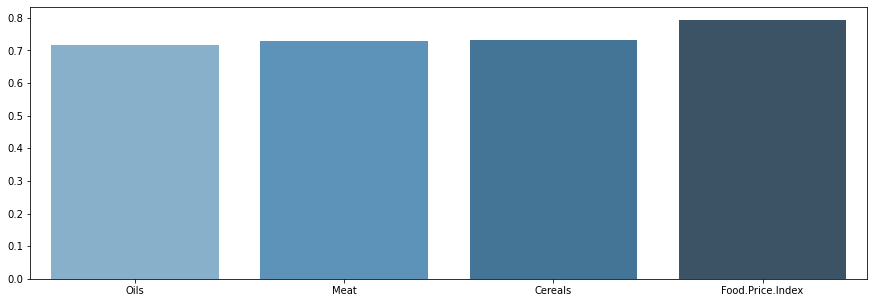

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x=df_corr["Sugar"].sort_values().iloc[1:-1].index, y=df_corr["Sugar"].sort_values().iloc[1:-1].values, palette= "Blues_d");

In [ ]:
df_corr[["Oils", "Sugar"]]

,Oils,Sugar
Food.Price.Index,0.942943,0.793038
Meat,0.745174,0.730003
Dairy,0.847405,0.654251
Cereals,0.924677,0.732810
Oils,1.000000,0.715907
Sugar,0.715907,1.000000


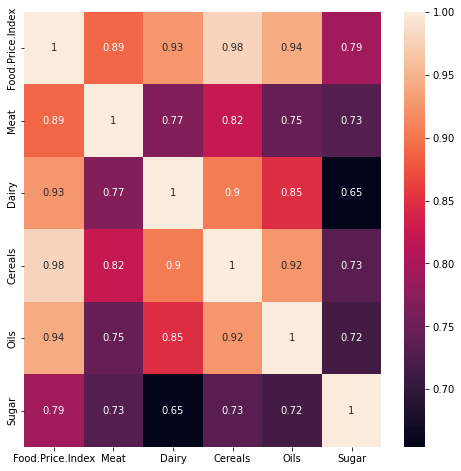

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df_corr, annot=True)
plt.show()